In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import glob
import string
import re
import pymorphy3
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


pio.renderers.default = "notebook"  
nltk.download('punkt_tab') 
nltk.download('stopwords') 

[nltk_data] Error loading punkt_tab: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [2]:
df = pd.read_csv('PDF_dataset.csv')
df_desc = pd.read_csv('imdb_rating.csv')
df

NameCompany  Raiting          DataPublish  \
0       red_mad_robot   117.94  2025-03-18 10:14:48   
1   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú   419.00  2025-03-18 10:14:48   
2             Cloud4Y    71.07  2025-03-18 10:14:48   
3             Cloud4Y    71.07  2025-03-18 10:14:48   
4   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú     6.00  2025-03-18 10:14:48   
5              280.79     4.29  2025-03-18 10:14:48   
6   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú   107.00  2025-03-18 10:14:48   
7   –ö–æ–Ω–∫—É—Ä—Å —Ä–∞—Å—Å–∫–∞–∑–æ–≤   466.00  2025-03-18 10:14:48   
8   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú    85.00  2025-03-18 10:14:48   
9          –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫   404.32  2025-03-18 10:14:48   
10          RUVDS.com  2376.90  2025-03-18 10:14:48   
11             353.18     4.58  2025-03-18 10:14:48   
12                 22     0.00  2025-03-18 10:14:48   
13          RUVDS.com  2394.92  2025-03-18 10:14:48   
14          RUVDS.com  2394.92  2025-03-18 10:14:48   
15          RUVDS.com  2394.92  2025-03-18 10:14:48   
16         –í—Å–µ –ø–æ—Ç–æ–∫–∏  2393.91  2025-03-18 10:14:48   
17                 14    15.00  2025-03-18 10:14:48   
18             414.35     4.74  2025-03-18 10:14:48   
19                  2     5.00  2025-03-18 10:14:48   

                                                 Text  
0   –°—Ä–µ–¥–Ω–∏–π18 –º–∏–Ω\nredmadrobot\nCocoapods, Carthag...  
1   –ï—â–µ –¥–æ –Ω–∞—á–∞–ª–∞ MWC –≤ –ë–∞—Ä—Å–µ–ª–æ–Ω–µ –±—ã–ª–æ –æ—á–µ–≤–∏–¥–Ω–æ, —á...  
2   –í–∑–ª–æ–º Instagram*‚Äë–∞–∫–∫–∞—É–Ω—Ç–∞ ‚Äî –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å ...  
3   –í–∑–ª–æ–º Instagram*–∞–∫–∫–∞—É–Ω—Ç–∞ ‚Äî –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å –≤...  
4   –ù–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∞—è –∫–æ–º–ø–∞–Ω–∏—è Yandex N.V. –ø–æ¬†–∏—Ç–æ–≥–∞–º —Ä...  
5   –û–±–µ—Å–ø–µ—á–∏–≤–∞–µ–º —Å—Ç–∞–±–∏–ª—å–Ω—É—é —Ä–∞–±–æ—Ç—É highload-–ø—Ä–æ–µ–∫—Ç...  
6   –ú–∏—Ç—á–µ–ª–ª –ë–µ–π–∫–µ—Ä, –≥–µ–Ω–¥–∏—Ä–µ–∫—Ç–æ—Ä Mozilla —Å 2020 –≥–æ–¥...  
7   –î–ª—è –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –≤–Ω–∏–º–∞–Ω–∏—è —Ä–∞—Å—Å–∫–∞–∂—É –∏—Å—Ç–æ—Ä–∏—é. –£–∂–µ...  
8   –ü—Ä–∏–≤–µ—Ç! –ú–µ–Ω—è –∑–æ–≤—É—Ç –î–µ–Ω–∏—Å, —è –∑–∞–Ω–∏–º–∞—é—Å—å –∫–æ–º–º–µ—Ä—á–µ...  
9   –í –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫–µ –º—ã –≤–Ω–µ–¥—Ä–∏–ª–∏ –ò–ò-–∞–≥–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ ...  
10   4 —á–∞—Å–∞ –Ω–∞–∑–∞–¥\n–ü—Ä–æ—Å—Ç–æ–π9 –º–∏–Ω\nru_vds\n–ò–Ω—Å—Ç—Ä—É–º–µ–Ω...  
11  –≠–∫–æ—Å–∏—Å—Ç–µ–º–∞ –¥–ª—è —Ä–∞–∑–≤–∏—Ç–∏—è –ª—é–¥–µ–π, –≤–æ–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –≤ I...  
12  look, use the source!\n1. –£–∫–∞–∑—ã–≤–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤...  
13  –æ–±—Ä–∞–∑–æ–≤ —ç—Ç–∏—Ö –¥–∏—Å–∫–æ–≤ –æ—Å—Ç–∞—ë—Ç—Å—è –∞–∫—Ç—É–∞–ª—å–Ω—ã–º. –ú–Ω–æ–≥–∏...  
14  –°—Ä–µ–¥–Ω–∏–π19 –º–∏–Ω\nartyomsoft\n–ö–∞–∫ —Å–æ–∑–¥–∞—Ç—å –∞–ø–ø–∞—Ä–∞—Ç...  
15  –í—Å–µ –ø–æ—Ç–æ–∫–∏\nVDS/VPS-—Ö–æ—Å—Ç–∏–Ω–≥. –°–∫–∏–¥–∫–∞ 15% –ø–æ –∫–æ–¥...  
16  RUVDS.com\nVDS/VPS-—Ö–æ—Å—Ç–∏–Ω–≥. –°–∫–∏–¥–∫–∞ 15% –ø–æ –∫–æ–¥—É...  
17  –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú\n\n–ò–¥–µ—è\n–ê –ø–æ—á–µ–º—É –±—ã –Ω–µ –∏—Å–ø–æ...  
18  –†–∞—Å—Å–∫–∞–∑—ã–≤–∞–µ–º –æ —Ç–æ–º, –∫–∞–∫ —Å—Ç—Ä–æ–∏—Ç—å –∫–∞—Ä—å–µ—Ä—É –≤ IT\n...  
19  Data Science —Å–µ–π—á–∞—Å –≤–æ –º–Ω–æ–≥–æ–º –±–ª–∞–≥–æ–¥–∞—Ä—è –∞–∫—Ç–∏–≤–Ω...

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [3]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '‚ùØ\xa0‚Äî¬´¬ª'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [4]:
df['Text'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(str(text).lower())))) for text in df['Text']]
df_desc['–û–ø–∏—Å–∞–Ω–∏–µ'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(str(text).lower())))) for text in df_desc['–û–ø–∏—Å–∞–Ω–∏–µ']]

df['Text'][0]

# —É–±—Ä–∞–ª –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é –∏ —Å–¥–µ–ª–∞–ª lower_case –¥–ª—è –æ—Å–Ω–æ–≤–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ —Å—Ç–∞—Ç—å–∏


'—Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω redmadrobot cocoapods carthage spm –∫–∞–∫ –≤—ã–±—Ä–∞—Ç—å –º–µ–Ω–µ–¥–∂–µ—Ä –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –≤ ios –±–ª–æ–≥ –∫–æ–º–ø–∞–Ω–∏–∏ red mad robot —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –ø–æ–¥ ios faq –∫–∞–∫ —Å—Ç–∞—Ç—å –∞–≤—Ç–æ—Ä–æ–º —Å—Ç–∞—Ä—à–∏–π ios —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ red mad robot –∞–Ω—è –∫–æ—á–µ—à–∫–æ–≤–∞ —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞–µ—Ç —á–µ–º –æ—Ç–ª–∏—á–∞—é—Ç—Å—è —Ç—Ä–∏ –º–µ–Ω–µ–¥–∂–µ—Ä–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –≤ –∫–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö –∏ –¥–ª—è –∫–∞–∫–∏—Ö –∑–∞–¥–∞—á –ø–æ–¥–æ–π–¥—ë—Ç —Ç–æ—Ç –∏–ª–∏ –∏–Ω–æ–π –º–∞—Ç–µ—Ä–∏–∞–ª –±—É–¥–µ—Ç –ø–æ–ª–µ–∑–µ–Ω –¥–∂—É–Ω —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞–º –∫–æ—Ç–æ—Ä—ã–µ —Ç–æ–ª—å–∫–æ –Ω–∞—á–∞–ª–∏ –ø–æ–≥—Ä—É–∂–∞—Ç—å—Å—è –≤ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫—É —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –¥–ª—è –Ω–∏—Ö –ø–æ–¥—Ä–æ–±–Ω–æ –æ–±—ä—è—Å–Ω—è–µ–º —á—Ç–æ —Ç–∞–∫–æ–µ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–æ–µ –≤–µ—Ä—Å–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞–∫ —É—Å—Ç—Ä–æ–µ–Ω—ã –º–æ–¥—É–ª–∏ –∫–æ–¥–∞ –∏ –≤ —á—ë–º —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏–º–∏ –∏ —Å—Ç–∞—Ç–∏—á–µ—Å–∫–∏–º–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞–º–

In [5]:
russian_stopwords = stopwords.words('russian') 

def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return " ".join(tokens)

In [6]:
df['tokenize_text'] = [tokenize(text) for text in df['Text']]

df_desc['tokenize_text_desc'] = [tokenize(text) for text in df_desc['–û–ø–∏—Å–∞–Ω–∏–µ']]


df['tokenize_text'].head(5)





0    —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω redmadrobot cocoapods carthage spm...
1    –Ω–∞—á–∞–ª–∞ mwc –±–∞—Ä—Å–µ–ª–æ–Ω–µ –æ—á–µ–≤–∏–¥–Ω–æ —Ö–æ—Ç—è –æ–ø–µ—Ä–∞—Ç–æ—Ä –ø—Ä...
2    –≤–∑–ª–æ–º instagram ‚Äë–∞–∫–∫–∞—É–Ω—Ç–∞ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å –ø–æ...
3    –≤–∑–ª–æ–º instagram –∞–∫–∫–∞—É–Ω—Ç–∞ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å –ø–æ–∏...
4    –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∞—è –∫–æ–º–ø–∞–Ω–∏—è yandex n v –∏—Ç–æ–≥–∞–º —Ä–µ—Å—Ç—Ä...
Name: tokenize_text, dtype: object

In [7]:
russian_stopwords = stopwords.words('russian') 

def remove_stopwords(text):
    text = [word for word in text if word not in russian_stopwords]
    return text

remove_stopwords(df['tokenize_text'])
remove_stopwords(df_desc['tokenize_text_desc'])

df['tokenize_text']


0     —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω redmadrobot cocoapods carthage spm...
1     –Ω–∞—á–∞–ª–∞ mwc –±–∞—Ä—Å–µ–ª–æ–Ω–µ –æ—á–µ–≤–∏–¥–Ω–æ —Ö–æ—Ç—è –æ–ø–µ—Ä–∞—Ç–æ—Ä –ø—Ä...
2     –≤–∑–ª–æ–º instagram ‚Äë–∞–∫–∫–∞—É–Ω—Ç–∞ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å –ø–æ...
3     –≤–∑–ª–æ–º instagram –∞–∫–∫–∞—É–Ω—Ç–∞ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å –ø–æ–∏...
4     –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∞—è –∫–æ–º–ø–∞–Ω–∏—è yandex n v –∏—Ç–æ–≥–∞–º —Ä–µ—Å—Ç—Ä...
5     –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ–º —Å—Ç–∞–±–∏–ª—å–Ω—É—é —Ä–∞–±–æ—Ç—É highload –ø—Ä–æ–µ–∫—Ç...
6     –º–∏—Ç—á–µ–ª–ª –±–µ–π–∫–µ—Ä –≥–µ–Ω–¥–∏—Ä–µ–∫—Ç–æ—Ä mozilla –≥–æ–¥–∞ –æ–±—ä—è–≤–∏...
7     –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –≤–Ω–∏–º–∞–Ω–∏—è —Ä–∞—Å—Å–∫–∞–∂—É –∏—Å—Ç–æ—Ä–∏—é –ª–µ—Ç –∂–∏–≤—É...
8     –ø—Ä–∏–≤–µ—Ç –∑–æ–≤—É—Ç –¥–µ–Ω–∏—Å –∑–∞–Ω–∏–º–∞—é—Å—å –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–º –ø—Ä–æ–≥...
9     –∞–ª—å—Ñ–∞ –±–∞–Ω–∫–µ –≤–Ω–µ–¥—Ä–∏–ª–∏ –∏–∏ –∞–≥–µ–Ω—Ç–æ–≤ –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–µ–∫—Ç...
10    —á–∞—Å–∞ –Ω–∞–∑–∞–¥ –ø—Ä–æ—Å—Ç–æ–π –º–∏–Ω ru vds –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –Ω–∞–±–ª...
11    —ç–∫–æ—Å–∏

In [8]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
        
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

df['text_stem'].head(5)

0    —Å—Ä–µ–¥–Ω –º–∏–Ω redmadrobot cocoapods carthage spm –≤...
1    –Ω–∞—á–∞ mwc –±–∞—Ä—Å–µ–ª–æ–Ω –æ—á–µ–≤–∏–¥–Ω —Ö–æ—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä –ø—Ä–µ–¥—Å—Ç–∞...
2    –≤–∑–ª–æ–º instagram ‚Äë–∞–∫–∫–∞—É–Ω—Ç –ø–æ–ø—É–ª—è—Ä–Ω –∑–∞–ø—Ä–æ—Å –ø–æ–∏—Å–∫...
3    –≤–∑–ª–æ–º instagram –∞–∫–∫–∞—É–Ω—Ç –ø–æ–ø—É–ª—è—Ä–Ω –∑–∞–ø—Ä–æ—Å –ø–æ–∏—Å–∫–æ...
4    –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫ –∫–æ–º–ø–∞–Ω yandex n v –∏—Ç–æ–≥ —Ä–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏...
Name: text_stem, dtype: object

In [9]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [10]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        

    
df['text_lemm'] = lemm_texts_list

df['text_lemm'].head(5)

CPU times: total: 2.3 s
Wall time: 2.43 s


0    —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω–∞ redmadrobot cocoapods carthage sp...
1    –Ω–∞—á–∞–ª–æ mwc –±–∞—Ä—Å–µ–ª–æ–Ω–∞ –æ—á–µ–≤–∏–¥–Ω—ã–π —Ö–æ—Ç—è –æ–ø–µ—Ä–∞—Ç–æ—Ä –ø...
2    –≤–∑–ª–æ–º instagram ‚Äë–∞–∫–∫–∞—É–Ω—Ç –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å –ø–æ–∏...
3    –≤–∑–ª–æ–º instagram –∞–∫–∫–∞—É–Ω—Ç –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∑–∞–ø—Ä–æ—Å –ø–æ–∏—Å...
4    –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∏–π –∫–æ–º–ø–∞–Ω–∏—è yandex n v –∏—Ç–æ–≥ —Ä–µ—Å—Ç—Ä—É–∫...
Name: text_lemm, dtype: object

In [11]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df_desc['tokenize_text_desc']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
        
    except Exception as e:
        print(e)
        
df_desc['text_stem_desc'] = stem_list

df_desc['text_stem_desc'].head(5)

0    –ø–æ–±–µÃÅ–≥ —à–æ—É—à–µÃÅ–Ω–∫ –∞–Ω–≥–ª the shawshank redemption ...
1                                  –∫—Ä–µ—Å—Ç–Ω –æ—Ç–µÃÅ—Ü –æ–∑–Ω–∞—á–∞
2    —Ç–µ–º–Ω —Ä—ãÃÅ—Ü–∞—Ä –∞–Ω–≥–ª the dark knight –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫ –ø–æ...
3    –∫—Ä–µ—Å—Ç–Ω –æ—Ç–µÃÅ—Ü –∞–Ω–≥–ª the godfather part ii –∞–º–µ—Ä–∏–∫...
4         —Ä–∞–∑–≥–Ω–µ–≤–∞ –º—É–∂—á–∏–Ω –∞–Ω–≥–ª twelve angry men –æ–∑–Ω–∞—á–∞
Name: text_stem_desc, dtype: object

In [12]:
%%time
lemm_texts_list = []
for text in (df_desc['tokenize_text_desc']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        

    
df_desc['text_lemm_desc'] = lemm_texts_list

df_desc['text_lemm_desc'].head(5)

CPU times: total: 1.33 s
Wall time: 1.38 s


0    –ø–æ–±–µÃÅ–≥ —à–æ—É—à–µÃÅ–Ω–∫–∞ –∞–Ω–≥–ª the shawshank redemption...
1                             –∫—Ä—ë—Å—Ç–Ω—ã–π –æ—Ç–µÃÅ—Ü–∞ –æ–∑–Ω–∞—á–∞—Ç—å
2    —Ç—ë–º–Ω—ã–π —Ä—ãÃÅ—Ü–∞—Ä—å –∞–Ω–≥–ª the dark knight –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫...
3    –∫—Ä—ë—Å—Ç–Ω—ã–π –æ—Ç–µÃÅ—Ü–∞ –∞–Ω–≥–ª the godfather part ii –∞–º–µ...
4    —Ä–∞–∑–≥–Ω–µ–≤–∞—Ç—å –º—É–∂—á–∏–Ω–∞ –∞–Ω–≥–ª twelve angry men –æ–∑–Ω–∞—á–∞—Ç—å
Name: text_lemm_desc, dtype: object

In [13]:
import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Z–∞-—è–ê-–Ø—ë–Å]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]

    #print(word_counts)
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text


df['text_lemm_clear'] = [remove_most_common_words(text, 5) for text in df['text_lemm']]
df_desc['text_lemm_desc_clear'] = [remove_most_common_words(text, 5) for text in df_desc['text_lemm_desc']]
df['text_stem_clear'] = [remove_most_common_words(text, 5) for text in df['text_stem']]
df_desc['text_stem_desc_clear'] = [remove_most_common_words(text, 5) for text in df_desc['text_stem_desc']]


df['text_lemm_clear'].head(10)

df_desc['text_lemm_desc_clear'].head(10)

0    ÃÅ —à–æ—É—à–µÃÅ–Ω–∫–∞ –∞–Ω–≥–ª the shawshank redemption –∏—Å–∫—É...
1                                                    ÃÅ
2    —Ä—ãÃÅ—Ü–∞—Ä—å –∞–Ω–≥–ª the dark knight –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π –ø–æ–ª–Ω...
3    –æ—Ç–µÃÅ—Ü–∞ –∞–Ω–≥–ª the godfather part ii –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π...
4                                         men –æ–∑–Ω–∞—á–∞—Ç—å
5    –≤–ª–∞—Å—Ç–µ–ª–∏ÃÅ–Ω –∫–æ–ª–µÃÅ—Ü–∞ –≤–æ–∑–≤—Ä–∞—â–µÃÅ–Ω–∏–µ –∫–æ—Ä–æ–ª—èÃÅ –∞–Ω–≥–ª l...
6    ÃÅ ÃÅ–Ω–¥–ª–µ—Ä–∞ schindler s list –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π —ç–ø–∏—á–µ—Å...
7    –∫—Ä–∏–º–∏–Ω–∞ÃÅ–ª—å–Ω—ã–π —á—Ç–∏ÃÅ–≤—ã–π –∞–Ω–≥–ª fiction –±—É–ª—å–≤–∞—Ä–Ω—ã–π ...
8    –≤–ª–∞—Å—Ç–µ–ª–∏ÃÅ–Ω –∫–æ–ª–µÃÅ—Ü–∞ –±—Ä–∞ÃÅ—Ç—Å—Ç–≤–æ –∫–æ–ª—å—Ü–∞ÃÅ –∞–Ω–≥–ª lord...
9    ÃÅ –ø–ª–æ—Ö–æÃÅ—Ç—å –∑–ª–æ–π –∏—Ç–∞–ª buono brutto cattivo –∞–Ω–≥–ª...
Name: text_lemm_desc_clear, dtype: object

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


# –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ø–∏—Å–∫–∞ —Å–ª–æ–≤
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# –ü–æ–ª—É—á–µ–Ω–∏–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

### –û–±–ª–∞–∫–æ —Å–ª–æ–≤ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞

<Axes: >

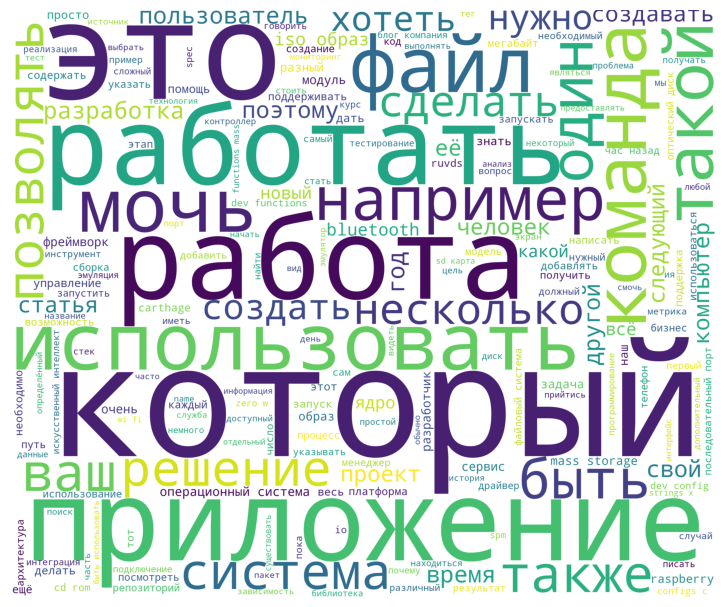

In [15]:
corpus = get_corpus(df['text_lemm_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

### –û–±–ª–∞–∫–æ —Å–ª–æ–≤ —Å—Ç–µ–º–º–∏–Ω–≥–æ–≤–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞

<Axes: >

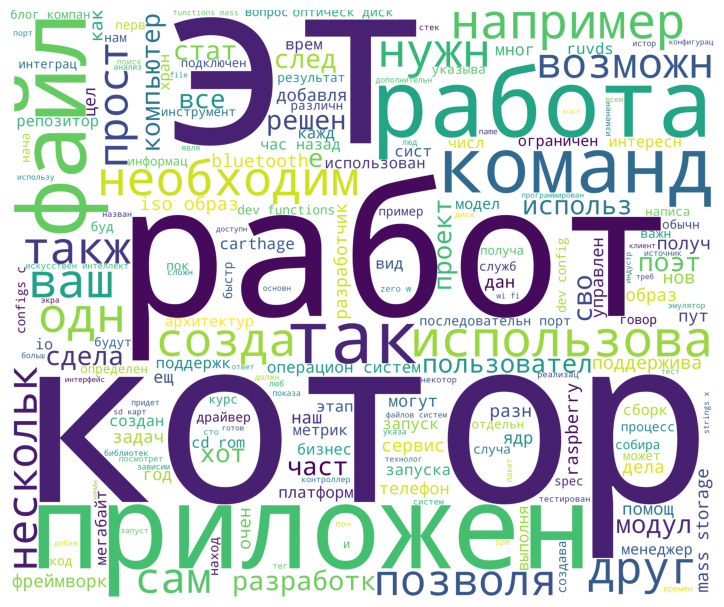

In [16]:
corpus = get_corpus(df['text_stem_clear'].values)
procWordCloud = get_wordCloud(corpus)
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

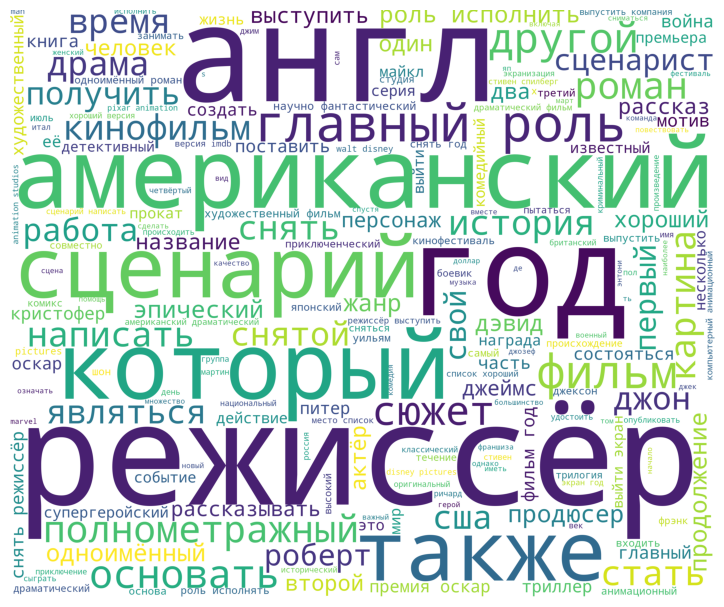

In [17]:
corpus = get_corpus(df_desc['text_lemm_desc_clear'].values)
procWordCloud = get_wordCloud(corpus)
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

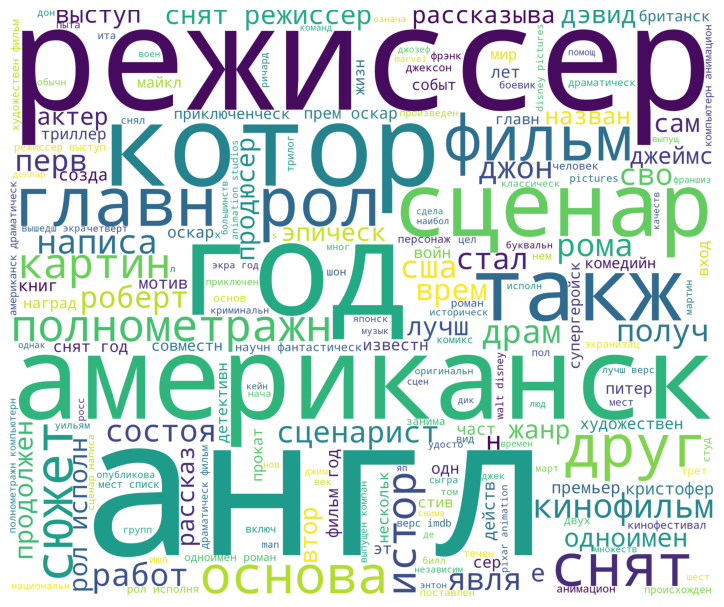

In [18]:
corpus = get_corpus(df_desc['text_stem_desc_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

# –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [19]:
def tokenize2(text):
    if isinstance(text, list):  
        return text  
    if not isinstance(text, str):  
        return []  
    
    tokens = word_tokenize(text.lower(), language='russian')
    tokens = [token for token in tokens 
              if token not in russian_stopwords and len(token) >= 2]
    return tokens  

In [20]:
import gensim

df_desc['text_lemm_desc_clear_tokenize'] = [tokenize2(text) for text in df_desc['text_lemm_desc_clear']]
df_desc['text_stem_desc_clear_tokenize'] = [tokenize2(text) for text in df_desc['text_stem_desc_clear']]

df['text_stem_clear_tokenize'] = [tokenize2(text) for text in df['text_stem_clear']]
df['text_lemm_clear_tokenize'] = [tokenize2(text) for text in df['text_lemm_clear']]
        


gensim_dictionary = gensim.corpora.Dictionary(df_desc['text_lemm_desc_clear_tokenize'])
gensim_dictionary.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary.compactify()


gensim_dictionary1 = gensim.corpora.Dictionary(df['text_lemm_clear_tokenize'])
gensim_dictionary1.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary1.compactify()

gensim_dictionary2 = gensim.corpora.Dictionary(df['text_stem_clear_tokenize'])
gensim_dictionary2.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary2.compactify()


corpus = [gensim_dictionary.doc2bow(text) 
          for text in df_desc['text_lemm_desc_clear_tokenize']]

corpus1 = [gensim_dictionary.doc2bow(text) 
          for text in df_desc['text_stem_desc_clear_tokenize']]

corpus2 = [gensim_dictionary1.doc2bow(text) 
          for text in df['text_lemm_clear_tokenize']]

corpus3 = [gensim_dictionary2.doc2bow(text) 
          for text in df['text_stem_clear_tokenize']]



In [21]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=10, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

lda_20.print_topics()

[(0,
  '0.045*"–∞–Ω–≥–ª" + 0.044*"–≥–æ–¥" + 0.043*"—Å–Ω—è—Ç—å" + 0.041*"—Ä–µ–∂–∏—Å—Å—ë—Ä" + 0.035*"–¥—Ä–∞–º–∞—Ç–∏—á–µ—Å–∫–∏–π" + 0.035*"–¥–∂–æ–Ω" + 0.035*"—Ñ–∏–ª—å–º" + 0.034*"–∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π" + 0.029*"—Ä–æ–º–∞–Ω" + 0.027*"the"'),
 (1,
  '0.039*"—Ö–æ—Ä–æ—à–∏–π" + 0.034*"–∞–Ω–≥–ª" + 0.033*"—Ä–µ–∂–∏—Å—Å—ë—Ä" + 0.031*"of" + 0.031*"–æ—Å–∫–∞—Ä" + 0.031*"–≥–æ–¥" + 0.029*"–∫–∞—Ç–µ–≥–æ—Ä–∏—è" + 0.029*"—Ä–∞–±–æ—Ç–∞" + 0.024*"–ø—Ä–µ–º–∏—è" + 0.023*"—Ç–∞–∫–∂–µ"'),
 (2,
  '0.032*"–ø–æ–ª–Ω–æ–º–µ—Ç—Ä–∞–∂–Ω—ã–π" + 0.029*"—Å—É–ø–µ—Ä–≥–µ—Ä–æ–π—Å–∫–∏–π" + 0.028*"–≤—Å–µ–ª–µ–Ω–Ω–∞—è" + 0.026*"—Ä–µ–∂–∏—Å—Å—ë—Ä" + 0.025*"–∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π" + 0.024*"—Å—é–∂–µ—Ç" + 0.023*"–æ—Å–Ω–æ–≤–∞—Ç—å" + 0.022*"–∞–Ω–≥–ª" + 0.021*"—Ç–∞–∫–∂–µ" + 0.020*"—Å–æ–∑–¥–∞—Ç—å"'),
 (3,
  '0.036*"—Ä–µ–∂–∏—Å—Å—ë—Ä" + 0.035*"—Ñ–∏–ª—å–º" + 0.024*"–≥–æ–¥" + 0.022*"–∫–æ—Ç–æ—Ä—ã–π" + 0.021*"–∏—Å—Ç–æ—Ä–∏—è" + 0.021*"–¥—Ä–∞–º–∞" + 0.021*"–º–µ—Å—Ç–æ" + 0.021*"–∫–∏–Ω–æ" + 0.021*"—Ö–æ—Ä–æ—à–∏–π" + 0.021*"–∂–∞–Ω—Ä"'),
 (4,
  '0.042

In [22]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


In [23]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

pyLDAvis.enable_notebook()

# LDA –¥–ª—è habr —Å—Ç–∞—Ç–µ–π

In [24]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.139805 -0.087466       1        1  14.299048
6     -0.053854  0.015688       2        1  14.100660
7     -0.008052  0.106089       3        1  12.868075
3      0.103853  0.055419       4        1  10.932618
0     -0.084972  0.115201       5        1   9.902955
1      0.095654  0.000759       6        1   9.177961
2     -0.142327 -0.058890       7        1   8.627687
4      0.122453 -0.012985       8        1   7.570752
5      0.087972 -0.156862       9        1   7.293465
8      0.019076  0.023047      10        1   5.226779, topic_info=              Term       Freq      Total Category  logprob  loglift
131     —Å–æ—Å—Ç–æ—è—Ç—å—Å—è  14.000000  14.000000  Default  30.0000  30.0000
128       –ø—Ä–µ–º—å–µ—Ä–∞  13.000000  13.000000  Default  29.0000  29.0000
125        —Ö–æ—Ä–æ—à–∏–π  29.000000  29.000000  Default  28.0000  28.0000
6    –¥—Ä–∞–º–∞—Ç–∏—á–µ—Å–∫–∏–π  20.000000  20.000000  Default  27.0000  27.0000
9          –∫–æ—Ç–æ—Ä—ã–π  46.000000  46.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
15          —Å—Ç–∏–≤–µ–Ω   1.366149  12.081539  Topic10  -4.6369   0.7717
19           —Ñ–∏–ª—å–º   2.338163  55.146823  Topic10  -4.0995  -0.2093
13        —Ä–µ–∂–∏—Å—Å—ë—Ä   2.666895  90.916375  Topic10  -3.9680  -0.5777
97            —Ä–æ–ª—å   1.863174  44.174461  Topic10  -4.3266  -0.2145
92         –≥–ª–∞–≤–Ω—ã–π   1.863261  46.149261  Topic10  -4.3266  -0.2582

[469 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
89        2  0.241572        and
89        3  0.241572        and
89        5  0.241572        and
89        8  0.120786        and
168       1  0.882933  animation
...     ...       ...        ...
156       6  0.179302         —è–ø
156       9  0.358604         —è–ø
137       2  0.246494   —è–ø–æ–Ω—Å–∫–∏–π
137       6  0.123247   —è–ø–æ–Ω—Å–∫–∏–π
137      10  0.492988   —è–ø–æ–Ω—Å–∫–∏–π

[900 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 8, 4, 1, 2, 3, 5, 6, 9])

In [25]:
lda_21 = gensim.models.LdaMulticore(corpus2, 
    num_topics=10, 
    id2word=gensim_dictionary1, 
    passes=10, random_state=6457)


vis_21 = gensimvis.prepare(lda_21, corpus2, gensim_dictionary1)

pyLDAvis.enable_notebook()

# LDA –¥–ª—è –æ–ø–∏—Å–∞–Ω–∏—è —Ñ–∏–ª—å–º–æ–≤

In [26]:
vis_21

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.156900  0.029899       1        1  35.030373
2      0.141982  0.048079       2        1  17.719067
4     -0.042682  0.104762       3        1  16.901954
9      0.071879 -0.172228       4        1  12.421807
0     -0.124329  0.124898       5        1  10.656296
3     -0.071952 -0.058837       6        1   4.414297
5     -0.143477 -0.114859       7        1   2.750137
7      0.005479  0.012646       8        1   0.035357
6      0.004065  0.012939       9        1   0.035357
8      0.002135  0.012701      10        1   0.035357, topic_info=            Term        Freq       Total Category  logprob  loglift
86         –æ–±—Ä–∞–∑   72.000000   72.000000  Default  30.0000  30.0000
195         —Ñ–∞–π–ª  106.000000  106.000000  Default  29.0000  29.0000
329       —Å–ª—É–∂–±–∞   36.000000   36.000000  Default  28.0000  28.0000
134   –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ   92.000000   92.000000  Default  27.0000  27.0000
295       —Å–µ—Ä–≤–∏—Å   40.000000   40.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
151  —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫    0.005695   32.349922  Topic10  -5.8423  -0.6974
126      –ø–æ—ç—Ç–æ–º—É    0.005704   40.078537  Topic10  -5.8407  -0.9100
178       —Å—Ç–æ–∏—Ç—å    0.005670   25.091226  Topic10  -5.8466  -0.4476
204         —ç—Ç–∞–ø    0.005667   25.985235  Topic10  -5.8472  -0.4832
109    –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞    0.005667   33.925406  Topic10  -5.8472  -0.7499

[569 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
336       1  0.110110       api
336       4  0.073407       api
336       5  0.807473       api
0         1  0.188265      data
0         2  0.031378      data
...     ...       ...       ...
204       7  0.038483      —ç—Ç–∞–ø
205       1  0.436253  —è–≤–ª—è—Ç—å—Å—è
205       2  0.145418  —è–≤–ª—è—Ç—å—Å—è
205       5  0.290836  —è–≤–ª—è—Ç—å—Å—è
205       6  0.096945  —è–≤–ª—è—Ç—å—Å—è

[943 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 10, 1, 4, 6, 8, 7, 9])

# –û—Ü–µ–Ω–∫–∞ CoherenceModel

In [27]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
    texts=df_desc['text_lemm_desc_clear_tokenize'],
    dictionary=gensim_dictionary,
    coherence="c_v")

coherence_model_habr = CoherenceModel(model=lda_20,
    texts=df['text_lemm_clear_tokenize'],
    dictionary=gensim_dictionary1,
    coherence="c_v")

coherence_value = coherence_model.get_coherence()
coherence_value_habr = coherence_model_habr.get_coherence()

print(f"–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Ñ–∏–ª—å–º–æ–≤: {coherence_value}")
print(f"–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–µ–π: {coherence_value_habr}")


classifiers =["–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Ñ–∏–ª—å–º–æ–≤", "–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–µ–π"]
log1 = pd.DataFrame()

log1["–ú–æ–¥–µ–ª—å"] = classifiers
log1["—Åoherence score"] = [coherence_value, coherence_value_habr]


–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Ñ–∏–ª—å–º–æ–≤: 0.60816869987031
–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–µ–π: 0.4190467204153226


In [28]:
log1

–ú–æ–¥–µ–ª—å  —Åoherence score
0  –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Ñ–∏–ª—å–º–æ–≤         0.608169
1   –ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–µ–π         0.419047

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

print(vectorizer.vocabulary_)


{'—Å—Ä–µ–¥–Ω–∏–π': 3759, '–º–∏–Ω–∞': 2162, 'redmadrobot': 614, 'cocoapods': 136, 'carthage': 109, 'spm': 701, '–≤—ã–±—Ä–∞—Ç—å': 1247, '–º–µ–Ω–µ–¥–∂–µ—Ä': 2128, '–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å': 1570, 'ios': 367, '–±–ª–æ–≥': 1019, '–∫–æ–º–ø–∞–Ω–∏—è': 1916, 'red': 612, 'mad': 450, 'robot': 641, '—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞': 3343, 'faq': 268, '—Å—Ç–∞—Ç—å': 3788, '–∞–≤—Ç–æ—Ä': 887, '—Å—Ç–∞—Ä—à–∏–π': 3782, '—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫': 3344, '–∞–Ω—è': 951, '–∫–æ—á–µ—à–∫–æ–≤–∞': 1987, '—Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞—Ç—å': 3383, '–æ—Ç–ª–∏—á–∞—Ç—å—Å—è': 2638, '–∫–∞–∫–æ–π': 1844, '—Å–ª—É—á–∞–π': 3613, '–∑–∞–¥–∞—á–∞': 1587, '–ø–æ–¥–æ–π—Ç–∏': 2856, '–∏–Ω–æ–π': 1770, '–º–∞—Ç–µ—Ä–∏–∞–ª': 2110, '–ø–æ–ª–µ–∑–Ω—ã–π': 2916, '–¥–∂—É–Ω–∞': 1443, '—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç': 3728, '–∫–æ—Ç–æ—Ä—ã–π': 1985, '–Ω–∞—á–∞—Ç—å': 2311, '–ø–æ–≥—Ä—É–∂–∞—Ç—å—Å—è': 2827, '—Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ': 3729, '–ø–æ–¥—Ä–æ–±–Ω–æ': 2862, '–æ–±—ä—è—Å–Ω—è—Ç—å': 2479, '—Ç–∞–∫–æ–π': 3866, '—Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π': 3536, '–≤–µ—Ä—Å–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ': 1104, '—É—

In [30]:
vectorizer.get_feature_names_out()[10:20]

array(['add', 'adriver', 'af', 'afnetworking', 'agent', 'agetty', 'agile',
       'agima', 'ai', 'airbnb'], dtype=object)

In [31]:
from gensim.utils import simple_preprocess

def text_to_vector(text, model):
    words = simple_preprocess(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

In [32]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)

df_desc['text_lemm_desc_clear_str'] = df_desc['text_lemm_desc_clear_tokenize'].apply(' '.join)
df['text_lemm_clear_str'] = df['text_lemm_clear_tokenize'].apply(' '.join)
df_desc['text_stem_desc_clear_str'] = df_desc['text_stem_desc_clear_tokenize'].apply(' '.join)
df['text_stem_clear_str'] = df['text_stem_clear_tokenize'].apply(' '.join)

count_matrix_lemm = vectorizer.fit_transform(df['text_lemm_clear_str'])
count_matrix_stem = vectorizer.fit_transform(df['text_stem_clear_str'])

count_matrix_lemm_desc = vectorizer.fit_transform(df_desc['text_lemm_desc_clear_str'])
count_matrix_stem_desc = vectorizer.fit_transform(df_desc['text_stem_desc_clear_str'])


count_matrix_lemm.shape

(20, 7685)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
    min_df=0.01, stop_words=russian_stopwords,
    ngram_range=(1,3))



tfidf_matrix_lemm = tfidf_vectorizer.fit_transform(df['text_lemm_clear_str'])
tfidf_matrix_stem = tfidf_vectorizer.fit_transform(df['text_stem_clear_str'])

tfidf_matrix_lemm_desc = tfidf_vectorizer.fit_transform(df_desc['text_lemm_desc_clear_str'])
tfidf_matrix_stem_desc = tfidf_vectorizer.fit_transform(df_desc['text_stem_desc_clear_str'])

In [34]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import numpy as np


In [35]:
w2v_model_lemm = Word2Vec(sentences=[text.split() for text in df['text_lemm_clear_str']],
                    vector_size=300, window=5, min_count=10, workers=4)

w2v_model_stem = Word2Vec(sentences=[text.split() for text in df['text_stem_clear_str']],
                    vector_size=300, window=5, min_count=10, workers=4)


w2v_model_lemm_desc = Word2Vec(sentences=[text.split() for text in df_desc['text_lemm_desc_clear_str']],
                    vector_size=300, window=5, min_count=10, workers=4)

w2v_model_stem_desc = Word2Vec(sentences=[text.split() for text in df_desc['text_stem_desc_clear_str']],
                    vector_size=300, window=5, min_count=10, workers=4)


w2v_matrix_lemm = np.array([text_to_vector(text, w2v_model_lemm) for text in df['text_lemm_clear_str']])
w2v_matrix_stem = np.array([text_to_vector(text, w2v_model_stem) for text in df['text_stem_clear_str']])

w2v_matrix_lemm_desc = np.array([text_to_vector(text, w2v_model_lemm) for text in df_desc['text_lemm_desc_clear_str']])
w2v_matrix_stem_desc = np.array([text_to_vector(text, w2v_model_stem) for text in df_desc['text_stem_desc_clear_str']])

tfidf_matrix_stem.shape

(20, 10000)

In [36]:
print("TF-IDF samples:", tfidf_matrix_lemm.shape[0])
print("Word2Vec samples:", w2v_matrix_lemm.shape[0])

TF-IDF samples: 20
Word2Vec samples: 20


## 2d –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ 

In [37]:
from sklearn.manifold import TSNE
def plot_tsne_optimized(X, title, texts, perplexity=None, text_length=20):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è t-SNE —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–æ–π –¥–ª—è –º–∞–ª—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        X - –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (TF-IDF –∏–ª–∏ Word2Vec)
        title - –∑–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
        texts - —Å–ø–∏—Å–æ–∫ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π
        perplexity - —Ä—É—á–Ω–∞—è —É—Å—Ç–∞–Ω–æ–≤–∫–∞ (None –¥–ª—è –∞–≤—Ç–æ)
    """
    n_samples = X.shape[0]
    
    if perplexity is None:
        perplexity = min(5, n_samples - 1)  
    
    if hasattr(X, 'toarray'):
        X = X.toarray()
    
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        random_state=42,
        learning_rate=50, 
        init='pca'  
    )
    
    X_2d = tsne.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)
    
    for i, (x, y) in enumerate(X_2d):
        plt.annotate(
            str(texts[i])[:text_length] + ("..." if len(str(texts[i])) > text_length else ""), 
            (x, y),
            fontsize=8,
            alpha=0.8,
            xytext=(10, 10),
            textcoords='offset points'
        )
    
    plt.title(f"{title}\nperplexity={perplexity}, n_samples={n_samples}")
    plt.grid(True, alpha=0.2)
    plt.show()


In [38]:
def tokenize_desc(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

df_desc['–û–ø–∏—Å–∞–Ω–∏–µ'] = [tokenize_desc(text) for text in df_desc['–û–ø–∏—Å–∞–Ω–∏–µ']]

# –†–∞–∑–º–µ—â–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å—Ç–∞—Ç–µ–π habr –Ω–∞ 2–¥ –ø–ª–æ—Å–∫–æ—Å—Ç–∏

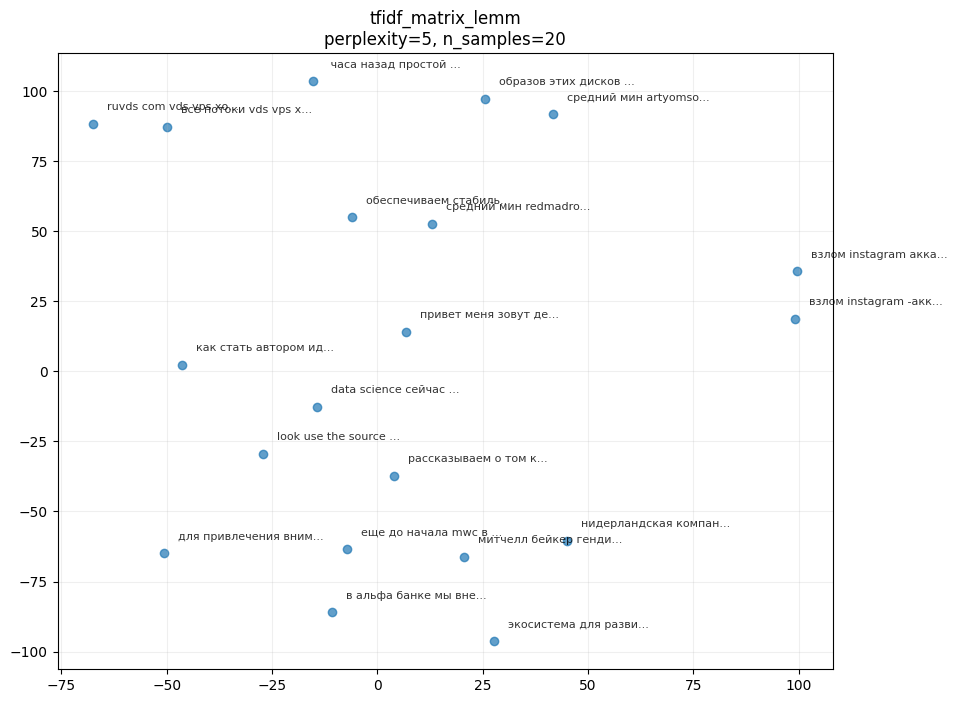

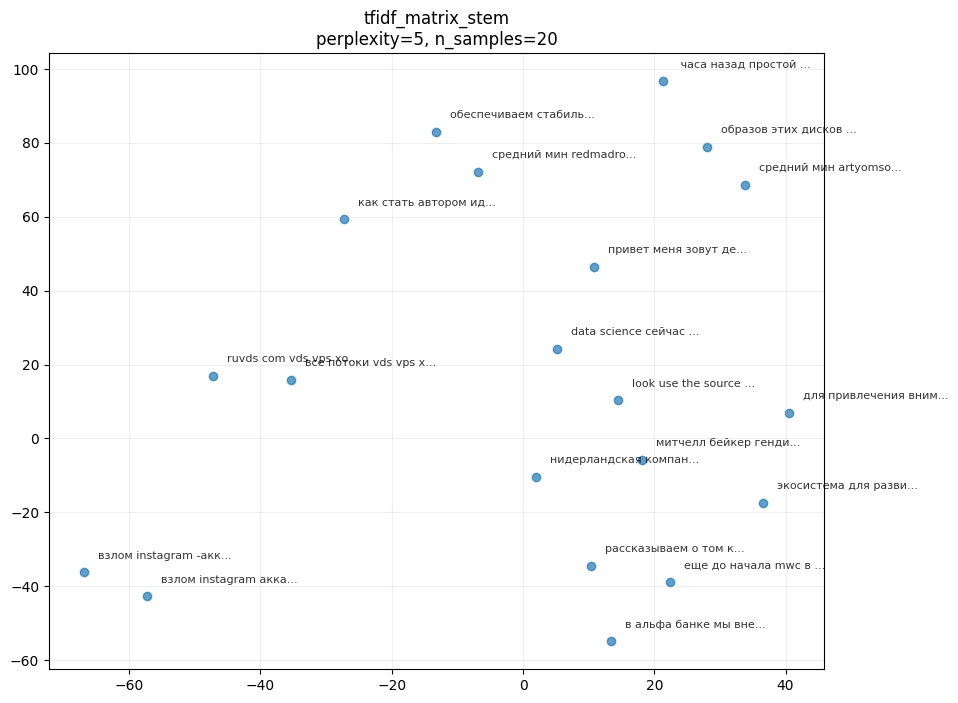

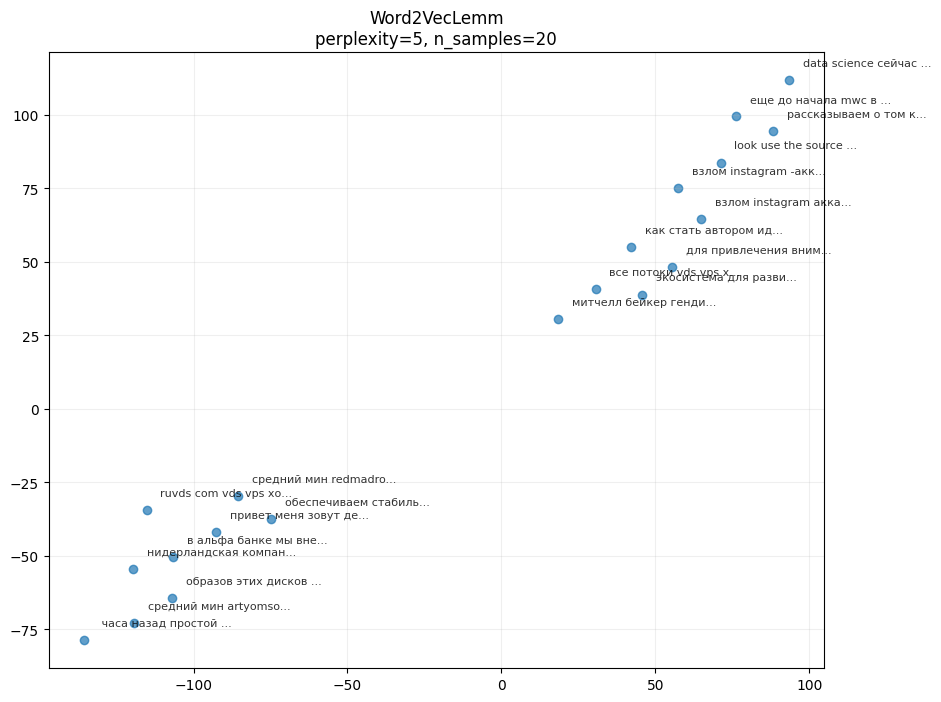

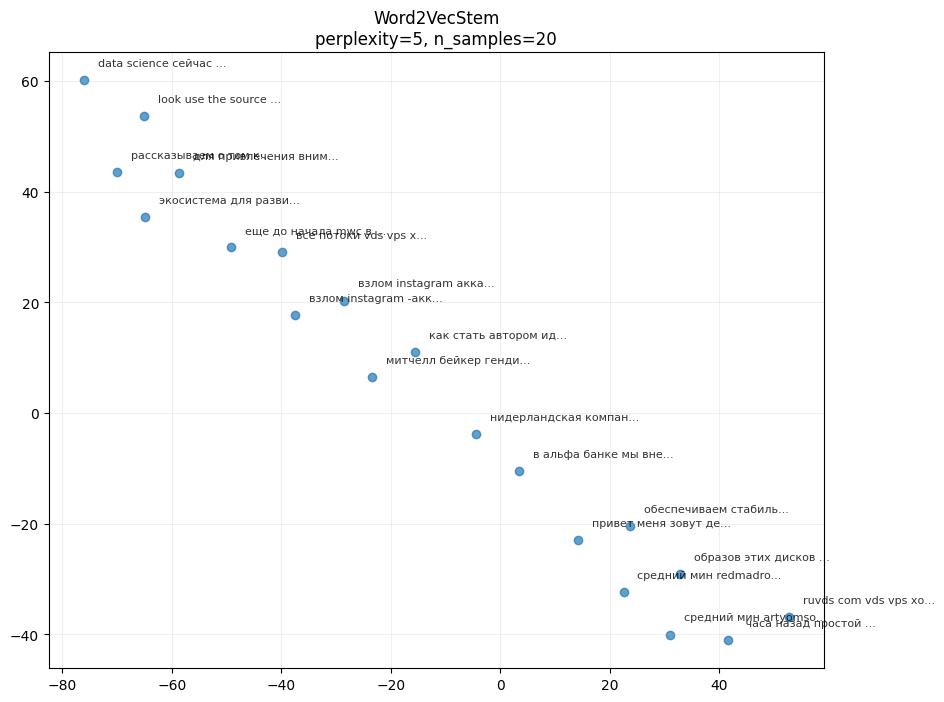

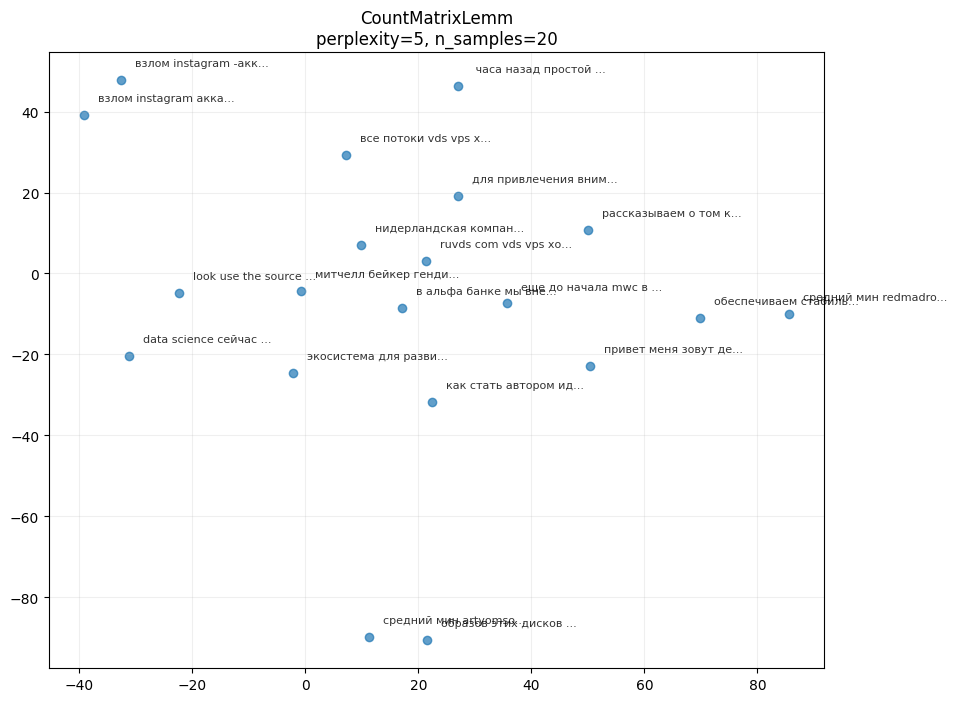

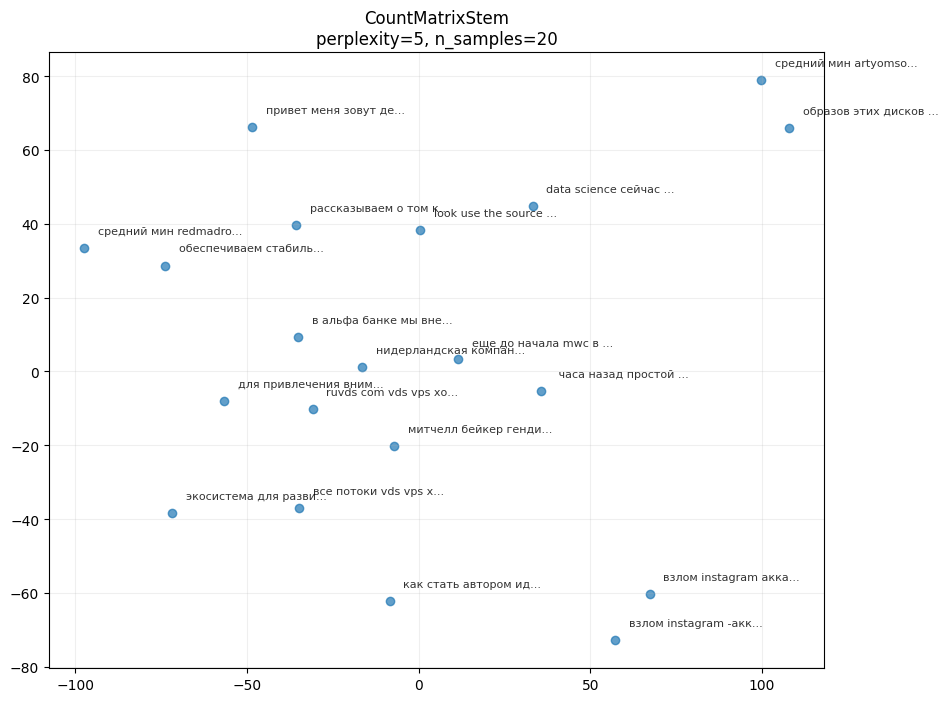

In [39]:
plot_tsne_optimized(tfidf_matrix_lemm, "tfidf_matrix_lemm", texts=df['Text'].tolist())
plot_tsne_optimized(tfidf_matrix_stem, "tfidf_matrix_stem",texts=df['Text'].tolist())
plot_tsne_optimized(w2v_matrix_lemm, "Word2VecLemm",texts=df['Text'].tolist())
plot_tsne_optimized(w2v_matrix_stem, "Word2VecStem",texts=df['Text'].tolist())
plot_tsne_optimized(count_matrix_lemm, 'CountMatrixLemm', texts=df['Text'].tolist())
plot_tsne_optimized(count_matrix_stem, 'CountMatrixStem', texts=df['Text'].tolist())

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è Kmeans –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤–µ–∫—Ç–æ—Ä–æ–≤ tfid, countMatrix, word2vec

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)

tfid_labels_lemm = kmeans.fit_predict(tfidf_matrix_lemm)  
tfid_labels_stem = kmeans.fit_predict(tfidf_matrix_stem) 

silhouette_tfid_lemm = silhouette_score(tfidf_matrix_lemm, tfid_labels_lemm)
silhouette_tfid_stem = silhouette_score(tfidf_matrix_stem, tfid_labels_stem)

In [41]:
word2vec_labels_lemm = kmeans.fit_predict(w2v_matrix_lemm)  
word2vec_labels_stem = kmeans.fit_predict(w2v_matrix_stem) 

silhouette_word2vec_lemm = silhouette_score(w2v_matrix_lemm, word2vec_labels_lemm)
silhouette_word2vec_stem = silhouette_score(w2v_matrix_stem, word2vec_labels_stem)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Å—Ç–∞—Ç–µ–π Habr

In [42]:
count_matrix_lemm_lables = kmeans.fit_predict(count_matrix_lemm)  
count_matrix_stem_lables = kmeans.fit_predict(count_matrix_stem) 

silhouette_count_matrix_lemm = silhouette_score(count_matrix_lemm, count_matrix_lemm_lables)
silhouette_count_matrix_stem = silhouette_score(count_matrix_stem, count_matrix_stem_lables)

In [43]:
import seaborn as sns
classifiers =["word2vec lemm", "word2vec stem", "count_matrix_lemm", "count_matrix_stem", "tfid_lemm", "tfid_stem"]
log_cols = ["Classifier","Silhoette score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Silhoette score"] = [silhouette_word2vec_lemm, silhouette_word2vec_stem, silhouette_count_matrix_lemm, silhouette_count_matrix_stem, silhouette_tfid_lemm, silhouette_tfid_stem]

In [44]:
log

Classifier  Silhoette score
0      word2vec lemm         0.578338
1      word2vec stem         0.484606
2  count_matrix_lemm         0.313604
3  count_matrix_stem         0.296831
4          tfid_lemm         0.124819
5          tfid_stem         0.116582

<Axes: title={'center': 'Vector'}, xlabel='Silhoette score', ylabel='Classifier'>

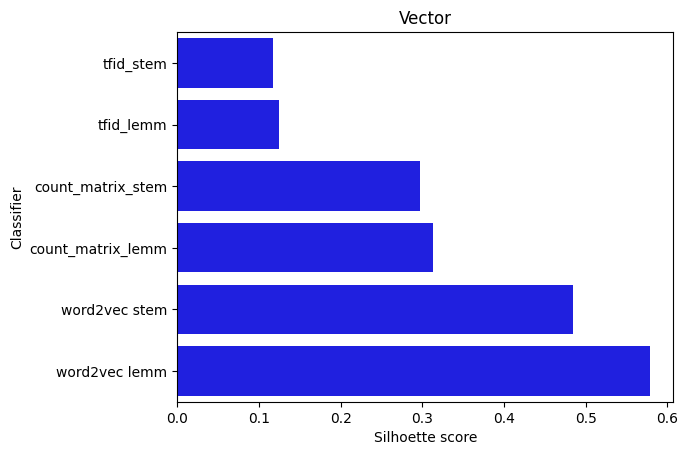

In [45]:

plt.xlabel('Silhoette score')
plt.title('Vector')

sns.barplot(x='Silhoette score', y='Classifier', data=log.sort_values(by='Silhoette score'), color="b")

In [46]:
kmeans_desc = KMeans(n_clusters=5, random_state=42)

tfid_labels_lemm_desc = kmeans_desc.fit_predict(tfidf_matrix_lemm_desc)  
tfid_labels_stem_desc = kmeans_desc.fit_predict(tfidf_matrix_stem_desc) 

silhouette_tfid_lemm_desc = silhouette_score(tfidf_matrix_lemm_desc, tfid_labels_lemm_desc)
silhouette_tfid_stem_desc = silhouette_score(tfidf_matrix_stem_desc, tfid_labels_stem_desc)

count_matrix_lemm_lables_desc = kmeans_desc.fit_predict(count_matrix_lemm_desc)  
count_matrix_stem_lables_desc = kmeans_desc.fit_predict(count_matrix_stem_desc) 

silhouette_count_matrix_lemm_desc = silhouette_score(count_matrix_lemm_desc, count_matrix_lemm_lables_desc)
silhouette_count_matrix_stem_desc = silhouette_score(count_matrix_stem_desc, count_matrix_stem_lables_desc)

word2vec_labels_lemm_desc = kmeans_desc.fit_predict(w2v_matrix_lemm_desc)  
word2vec_labels_stem_desc = kmeans_desc.fit_predict(w2v_matrix_stem_desc) 

silhouette_word2vec_lemm_desc  = silhouette_score(w2v_matrix_lemm_desc, word2vec_labels_lemm_desc)
silhouette_word2vec_stem_desc  = silhouette_score(w2v_matrix_stem_desc, word2vec_labels_stem_desc)



classifiers =["word2vec lemm", "word2vec stem", "count_matrix_lemm", "count_matrix_stem", "tfid_lemm", "tfid_stem"]
log_cols = ["Classifier","Silhoette score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Silhoette score"] = [silhouette_word2vec_lemm_desc, silhouette_word2vec_stem_desc, silhouette_count_matrix_lemm_desc, silhouette_count_matrix_stem_desc, silhouette_tfid_lemm_desc, silhouette_tfid_stem_desc]


In [47]:
log

Classifier  Silhoette score
0      word2vec lemm         0.633213
1      word2vec stem         0.657886
2  count_matrix_lemm         0.242764
3  count_matrix_stem         0.248239
4          tfid_lemm         0.080174
5          tfid_stem         0.066582

<Axes: title={'center': 'Vector'}, xlabel='Silhoette score', ylabel='Classifier'>

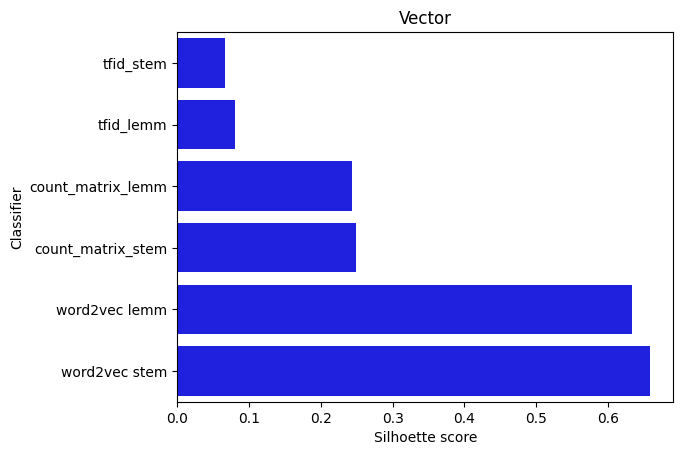

In [48]:

plt.xlabel('Silhoette score')
plt.title('Vector')

sns.barplot(x='Silhoette score', y='Classifier', data=log.sort_values(by='Silhoette score'), color="b")